In [2]:
import pandas as pd
file_path = 'data/gender_classification_v7.csv'
data = pd.read_csv(file_path)
data

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [4]:
# y값은   gender    범주형 데이타
data['gender'].value_counts()

gender
Female    2501
Male      2500
Name: count, dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder

label_enc = LabelEncoder()
data['gender'] = label_enc.fit_transform(data['gender'])

data.head() # gender가 1과 0으로 인코딩 됨

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0


In [7]:
# 특성과 타켓으로 분리
X = data.drop('gender', axis = 1) # 학습용 데이타
y = data['gender']

X.shape, y.shape


((5001, 7), (5001,))

In [10]:
# 상관관계

cor_matrix = data.corr()
cor_matrix

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
long_hair,1.000000,-0.006530,-0.017233,0.001216,0.014432,0.011287,-0.025794,-0.010767
forehead_width_cm,-0.006530,1.000000,0.088596,0.251648,0.257368,0.258564,0.251328,0.334125
forehead_height_cm,-0.017233,0.088596,1.000000,0.211655,0.194120,0.205441,0.215292,0.277190
nose_wide,0.001216,0.251648,0.211655,1.000000,0.565192,0.557615,0.569303,0.758502
nose_long,0.014432,0.257368,0.194120,0.565192,1.000000,0.561229,0.559794,0.744147
lips_thin,0.011287,0.258564,0.205441,0.557615,0.561229,1.000000,0.565312,0.743319
distance_nose_to_lip_long,-0.025794,0.251328,0.215292,0.569303,0.559794,0.565312,1.000000,0.754850
gender,-0.010767,0.334125,0.277190,0.758502,0.744147,0.743319,0.754850,1.000000


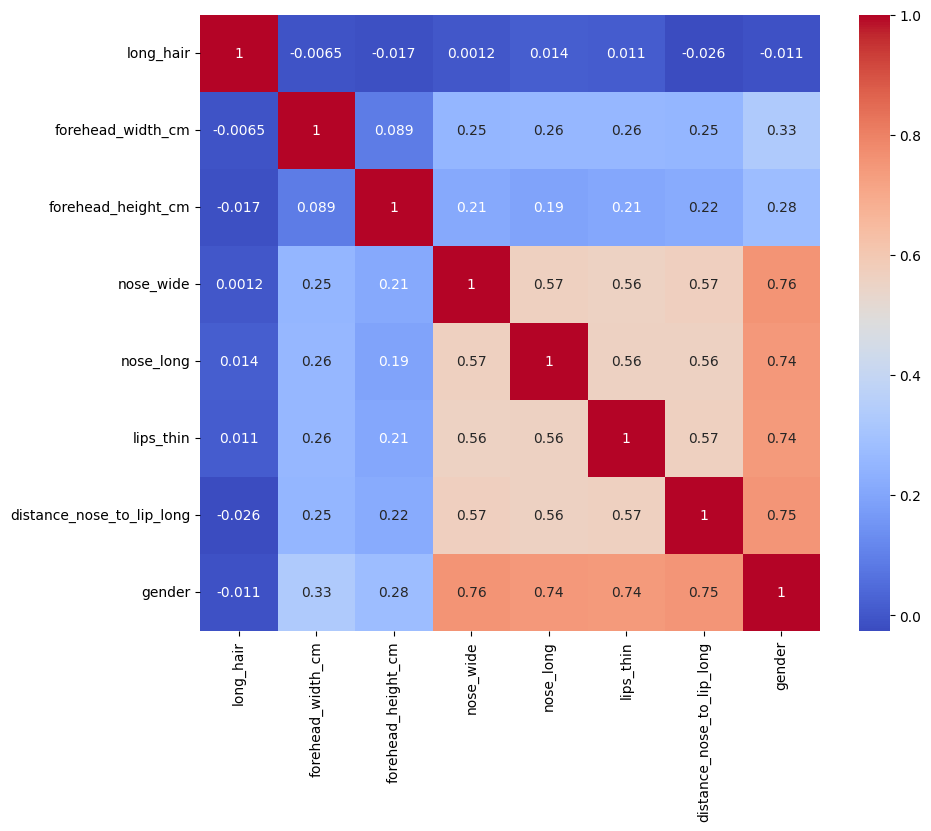

In [12]:
# 상관관계 시각화
import seaborn as sns
import matplotlib.pylab as plt

plt.figure(figsize = (10,8))
sns.heatmap( cor_matrix, annot=True, cmap='coolwarm')
plt.show()

In [17]:
from sklearn.model_selection import train_test_split

# 데이터분할 : 훈련 - 테스트
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4000, 7), (1001, 7), (4000,), (1001,))

In [19]:
# 모델 생성

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

# 학습
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)
y_pred


array([1, 0, 0, ..., 0, 1, 0])

In [20]:
from sklearn.metrics import accuracy_score

# 평가
accuracy_score(y_test, y_pred)
# 96%를 맞추었다.


0.9600399600399601

In [ ]:
# classfic